<a href="https://colab.research.google.com/github/Rishabh-441/Deep_Learning_Models/blob/main/Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORTING LIBRAIRES***

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# ***SPLITTING INTO TRAINING AND TESTING DATA***

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
len(x_train)

60000

In [30]:
len(x_test)

10000

In [31]:
x_train[0].shape

(28, 28)

In [32]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

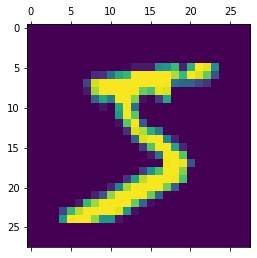

In [33]:
plt.matshow(x_train[0])

In [34]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


# **SCALING**

In [35]:
x_train = x_train / 255
x_test = x_test / 255

In [36]:
x_train_flatten = x_train.reshape(len(x_train),28*28)

In [37]:
x_train_flatten.shape

(60000, 784)

In [38]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# ***FITTING*** 

In [39]:
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape = (784,), activation='sigmoid'
                  )
        ])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
        )
model.fit(x_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4716 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9261


In [40]:
x_test_flatten = x_test.reshape(len (x_test), 28*28)
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.9247


[0.2681480944156647, 0.9247000217437744]

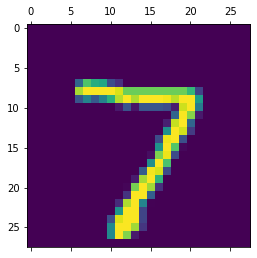

In [41]:
plt.matshow(x_test[0])

In [42]:
y_pred = model.predict(x_test_flatten)

In [43]:
print(y_pred[0])

[2.7049899e-02 3.2252586e-07 8.7772697e-02 9.6126568e-01 2.5475919e-03
 1.4993399e-01 8.3951431e-07 9.9984187e-01 8.7262034e-02 7.1103400e-01]


In [44]:
np.argmax(y_pred[0])

7

In [45]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
print(y_test[:5])

[7 2 1 0 4]


# ***CONFUSION MATRIX***



In [48]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
print(cm)     #confusion matrix

tf.Tensor(
[[ 966    0    0    2    0    4    2    3    2    1]
 [   0 1109    4    2    1    1    3    2   13    0]
 [   8    9  917   17   14    4    8   12   39    4]
 [   3    0   17  917    1   30    1   14   20    7]
 [   2    1    4    1  921    0    6    4    9   34]
 [  10    1    5   28   12  787    8    6   28    7]
 [  15    3    9    1    9   17  899    2    3    0]
 [   1    5   24    4    8    0    0  950    2   34]
 [   7    8    6   22    9   30    7   12  863   10]
 [  11    7    1   11   25    6    0   26    4  918]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

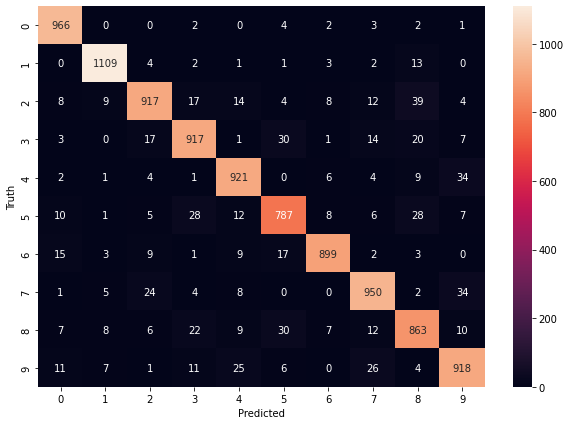

In [51]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ***ADDING HIDDEN LAYERS***

In [52]:
model = keras.Sequential([
                  keras.layers.Dense(100, input_shape = (784,), activation='relu'),  #adding more layer
                  keras.layers.Dense(10, activation = 'sigmoid')
        ])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
        )
model.fit(x_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1219 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0849 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9848


In [54]:
x_test_flatten = x_test.reshape(len (x_test), 28*28)
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9778


[0.0767529308795929, 0.9778000116348267]

In [56]:
y_pred = model.predict(x_test_flatten)
y_pred_labels = [np.argmax(i) for i in y_pred]

In [57]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
print(cm)     #confusion matrix

tf.Tensor(
[[ 974    0    0    2    0    0    3    1    0    0]
 [   0 1127    2    1    0    1    2    2    0    0]
 [   7    1 1011    1    1    0    2    3    6    0]
 [   0    1    6  990    0    2    0    5    3    3]
 [   4    0    2    0  959    0    4    2    1   10]
 [   2    0    0   10    0  867    8    1    2    2]
 [   6    2    1    1    5    2  940    0    1    0]
 [   0    6    8    1    0    0    0 1003    1    9]
 [   9    0    3   11    6    6    3    3  928    5]
 [   4    4    0    5    6    1    0    7    3  979]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

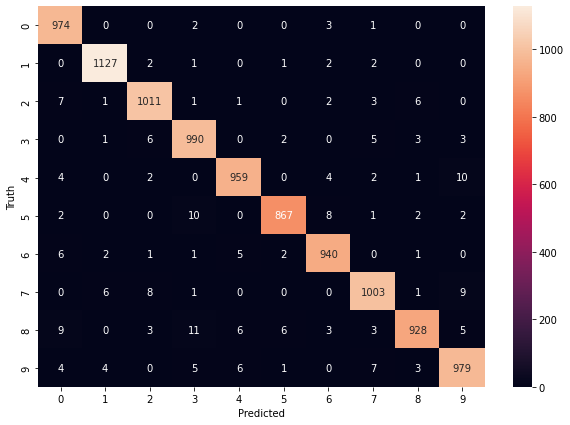

In [58]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')